In [176]:
# run this cell to download the models from dlib
from dlib_models import download_model, download_predictor, load_dlib_models
download_model()
download_predictor()
from dlib_models import models

File already exists:
	/Users/caseygoldstein/DlibModels/dlib_models/dlib_face_recognition_resnet_model_v1.dat
File already exists:
	/Users/caseygoldstein/DlibModels/dlib_models/shape_predictor_68_face_landmarks.dat


File already exists:
	/Users/caseygoldstein/DlibModels/dlib_models/dlib_face_recognition_resnet_model_v1.dat
File already exists:
	/Users/caseygoldstein/DlibModels/dlib_models/shape_predictor_68_face_landmarks.dat
No camera config found, using defaults
	 port=0, exposure=0.7


<IPython.core.display.Javascript object>


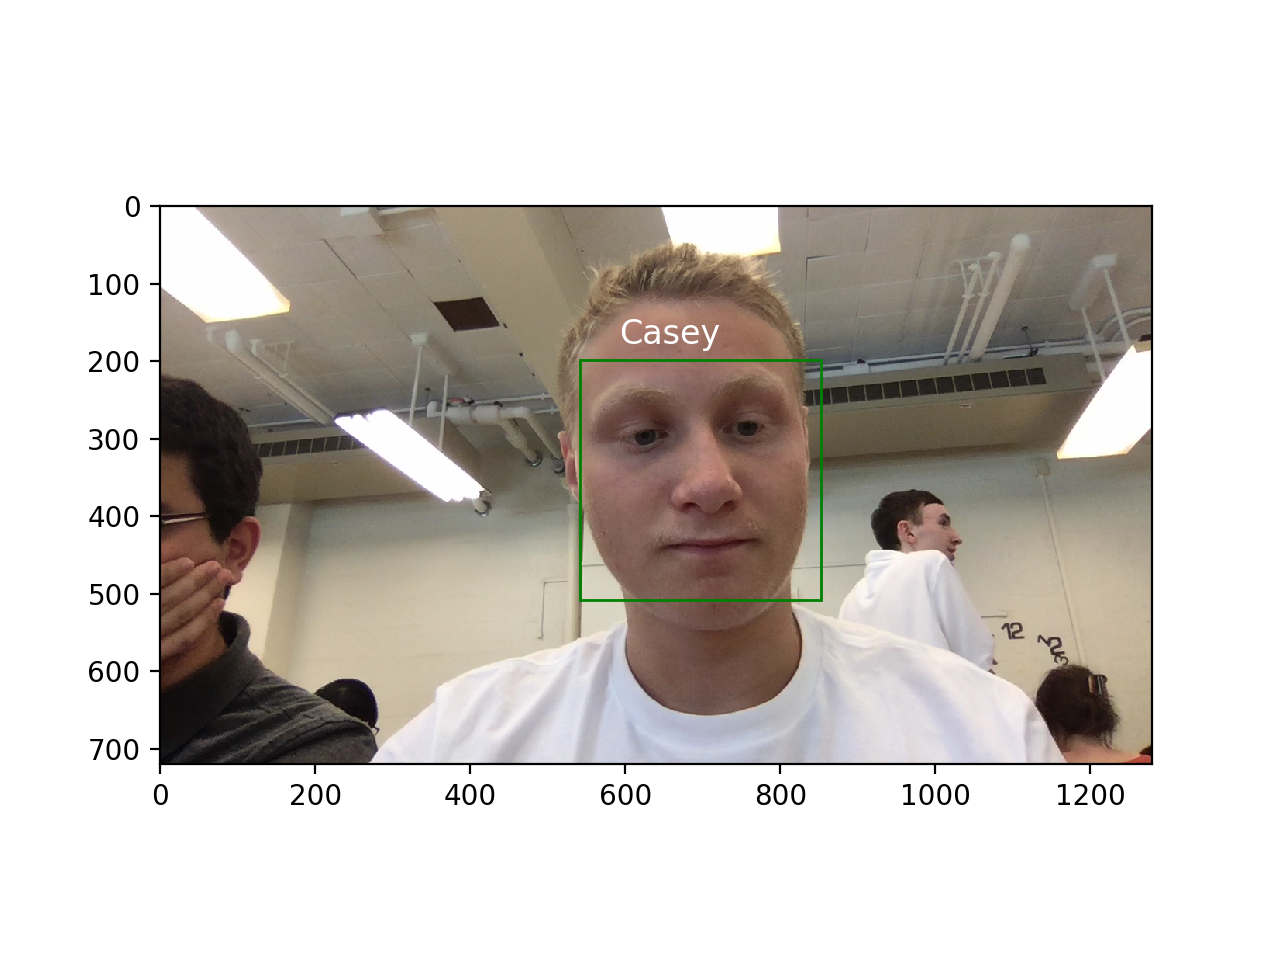

In [177]:
%matplotlib notebook
import matplotlib.pyplot as plt
from camera import take_picture
import numpy as np
import skimage.io as io
import matplotlib.image as mpimg
from dlib_models import download_model, download_predictor, load_dlib_models
download_model()
download_predictor()
from dlib_models import models
from matplotlib.patches import Rectangle
from matplotlib.text import Text
load_dlib_models()
face_detect = models["face detect"]
face_rec_model = models["face rec"]
shape_predictor = models["shape predict"]

#requires import skimage.io as io
def uploadimage(imgpath):
    pic = io.imread(impath)
    return pic


pic = take_picture()


with open('/Users/caseygoldstein/Downloads/therealdatabase.pkl','rb') as handle:
    face_dict = pickle.load(handle)



#takes in image --> returns descriptions for everyone in image

def makedescriptors (img):
    detections = list(face_detect(img))

    if len(detections) == 0:
        print('Sorry! No Face Detected.')
    descriptors = []
    for i in range(len(detections)):
        shape = shape_predictor(img, detections[i])
        descriptors.append(np.array(face_rec_model.compute_face_descriptor(img, shape)))
    return descriptors

#calculates difference between two image descriptions
def calcdiff(imgdesc1, imgdesc2):
    # The use of `np.newaxis` here is equivalent to our
    # use of the `reshape` function
    a = (imgdesc1-imgdesc2)**2
    a = np.sum(a)
    return np.sqrt(a)
    

#takes in database and image description, and returns an array of all the people present in the photo
def labelface (database,imgdescs):
    
    keys_in_database = list(database.keys())
    values_in_database = list(database.values())
    output = []
    minvalindex = 0
    for i in range (len(descriptors)):
        for j in range(len(database)):
            
            if (calcdiff(values_in_database[j],imgdescs[i]) < calcdiff(values_in_database[minvalindex],imgdescs[i])):
                
                minvalindex = j

        if(calcdiff(values_in_database[minvalindex],imgdescs[i])<.5):
            output.append(keys_in_database[minvalindex])
        else:
            output.append('Unknown')
    return output

descriptors = makedescriptors(pic)

output = (labelface(face_dict,descriptors))

detections = list(face_detect(pic))
#print(detections)
fig,ax2 = plt.subplots()
from matplotlib.patches import Rectangle
from matplotlib.text import Text

for k in range(len(detections)):
    width = detections[k].right()-detections[k].left()
    height = detections[k].top()-detections[k].bottom()
    ax2.text(detections[k].left()+50,detections[k].top()-20 ,output[k], fontsize=12,color='white')
    rect = Rectangle((detections[k].left(),detections[k].bottom()),width,height,linewidth=1,edgecolor='g', facecolor="None")
    ax2.add_patch(rect)
    
ax2.imshow(pic)